## The fishery problem

We name the annual catch $y$ (in monetary value). It depends on the stock of fish $s$ and the number of fishing boats $b$. The dependency between the different variables is given by the following equation:

- $y = f(s,b)$. The catch depends on the stock and the number of boats.
- $\frac{\partial y}{\partial s} > 0$, the catch increases with the stock.
- $\frac{\partial y}{\partial b} > 0$, the catch increases with the number of boats.
- $\frac{\partial^2 y}{\partial b^2} < 0$, each additional boat catch less.

We can finally write the cost of fishing as $c = wb$, where $w$ is the cost of sending out a single boat. Let us now sketch the cost and the revenue of fishing as a function of the number of boats.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def y_t(s_t, b_t, y_0: float = 0.01):
    """
    Annual catch as a function of stock and number of boats. 
    Let us take the value from the book for the moment.
    """
    return y_0* s_t * np.sqrt(b_t)

def c_t(b_t, c_0:float=0.125):
    """
    Cost of fishing as a function of the number of boats.
    Let us take the value from the book for the moment.
    """
    return c_0 * b_t

def g_t(s_t:float, g_0 : float = 0.01, g_1: float = 0.01):
    """
    Regeneration of the stock as a function of the stock.
    Let us take the value from the book for the moment.
    It is modelled to evolve with

    g_t = g_0 * (s_t - g_1 * s_t**2)

    Args:
        s_t: stock at time t
        g_0: linear prefactor
        g_1: quadratic prefactor
    """
    return g_0 * (s_t - g_1 * s_t**2)

def b_c(y_0:float, s_t:float, c_t:float):
    """
    What is the number of boats that gives us maximum catch with no losses ?
    If we were really smart, we could calculate it from the condition y_t = c_t


    Args:
        y_0: initial catch per boat
        s_t: stock at time t
        c_t: cost of fishing per boat
    """

    return  (y_0 * s_t/c_t)**2


In [20]:
# ressource stock
st = 100
nplayers = 2
n_rounds = 8
# some model parameters

# parameters of the growth rate
g0 = 0.03; g1 = 0.001

# parameters for the catches
y0 = 0.01

# parameter for the cost
c0 = 0.125
# initial stock
s_init = 100

# Steady states

We would like to see what happens in a stable situation. There we have actually $g_t(s_t) = y_t(s_t, b_t)$. This depends really on the specific model. In the case of the book we can write:


$g_0 (s_t - g_1  s_t^2) = y_0  s_t  \sqrt{b_t}$

$g_0 (1 - g_1  s_t) = y_0  \sqrt{b_t}$

Solving for total number of boats that is sustainable: 

$b_{sust} = \left(\frac{g_0}{y_0} (1 - g_1  s_{init})\right)^2$

In [21]:
b_sust = (g0 / y0 * (1 - g1 * s_init)) ** 2

low_fishing:int = np.floor(b_sust / nplayers)
print(low_fishing)

3.0


## The competetive argument

Let us now also look at the competetive argument. This says that the fishers should go for the situation where $y_t = c_t$. Let us solve for this:

$y_0 s_t \sqrt{b_t} = c_0  {b_t}$

And we get the number of boats for the person that looks at the situation in the competetive sense


$b_c = \left(\frac{y_0 s_t}{c_0}\right)^2 $



In [22]:
bc = b_c(y0, s_init, c0)
print(bc)

intensive_fishing = np.floor(bc / nplayers)
print(intensive_fishing)

64.0
32.0


In [23]:
# boats_t = np.array([[intensive_fishing, intensive_fishing], [low_fishing,intensive_fishing], [intensive_fishing, low_fishing], [intensive_fishing, intensive_fishing], [low_fishing, intensive_fishing], [intensive_fishing, low_fishing], [intensive_fishing, intensive_fishing], [low_fishing, intensive_fishing], [intensive_fishing, low_fishing]])

# sustainable fishing
# boats_t = low_fishing*np.ones((n_rounds, 2))

# intensive fishing
# boats_t = intensive_fishing * np.ones((n_rounds, 2))

# random fishing
boats_t = np.random.choice([low_fishing, intensive_fishing], size=(n_rounds, 2))

st = s_init
total_boats_t = np.sum(boats_t, axis=1)
print(f'Total boats: {total_boats_t}')
# normalize efforts
catch_players = np.zeros((nplayers, len(total_boats_t)))
stock_evolution = np.zeros(len(total_boats_t))
for i, b_t in enumerate(total_boats_t):
    # now safe the time evolution of the stock
    stock_evolution[i] = st
    # how much will the stock regenerate?
    gt = g_t(st, g0, g1)
    yt = y_t(st, b_t, y0)
    print(f'Round {i+1}: Total catch = {yt}')
    for j in range(nplayers):
        share = boats_t[i, j] / total_boats_t[i]
        catch_players[j, i] = share*yt
        print(f'Player {j+1} catch = {catch_players[j, i]}')
    # update stock
    st = st - yt+ gt
    print(f'New stock = {st}')

# cumulative catch after each round
print(f'Catch players: {catch_players}')
cumulative_catch = np.cumsum(catch_players, axis=1)
print(f'Cumulative catch: {cumulative_catch}')

Total boats: [64. 35. 35. 35. 35. 35. 35. 35.]
Round 1: Total catch = 8.0
Player 1 catch = 4.0
Player 2 catch = 4.0
New stock = 94.7
Round 2: Total catch = 5.602527554595337
Player 1 catch = 5.122310907058593
Player 2 catch = 0.4802166475367432
New stock = 91.66942974540466
Round 3: Total catch = 5.423236600450591
Player 1 catch = 4.958387748983397
Player 2 catch = 0.4648488514671935
New stock = 88.74417750682078
Round 4: Total catch = 5.250176344159061
Player 1 catch = 4.800161228945427
Player 2 catch = 0.4500151152136338
New stock = 85.92006061662548
Round 5: Total catch = 5.083099335767115
Player 1 catch = 0.43569422878003844
Player 2 catch = 4.647405106987077
New stock = 83.19309539486619
Round 6: Total catch = 4.9217698975904565
Player 1 catch = 4.499903906368417
Player 2 catch = 0.4218659912220391
New stock = 80.55948562548035
Round 7: Total catch = 4.765963442458085
Player 1 catch = 4.357452290247392
Player 2 catch = 0.40851115221069295
New stock = 78.01561183005941
Round 8: Tot

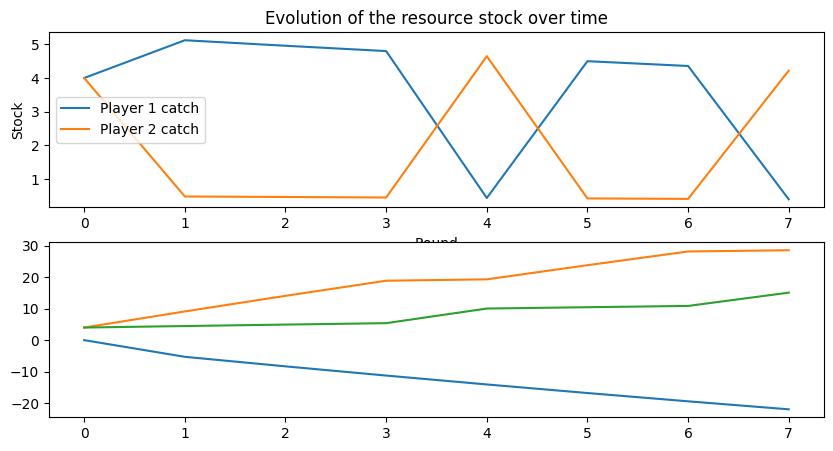

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
ax1.plot(catch_players[0, :], label='Player 1 catch')
ax1.plot(catch_players[1, :], label='Player 2 catch')
ax1.legend()
ax1.set_xlabel('Round')
ax1.set_ylabel('Stock')
ax1.set_title('Evolution of the resource stock over time')

ax2.plot(stock_evolution-stock_evolution[0], label='Stock evolution')
ax2.plot(cumulative_catch[0, :], label='Player 1 catch')
ax2.plot(cumulative_catch[1, :], label='Player 2 catch')


## Making the cost analysis

John Leach actually extended the analysis above to the a cost analysis. This made possible be the decreasing returns of the catch. The cost of fishing is given by $c = wb$, where $w$ is the cost of sending out a single boat. Let us now sketch the cost and the revenue of fishing as a function of the number of boats.

Text(0.5, 1.0, 'Total catch and cost as a function of effort')

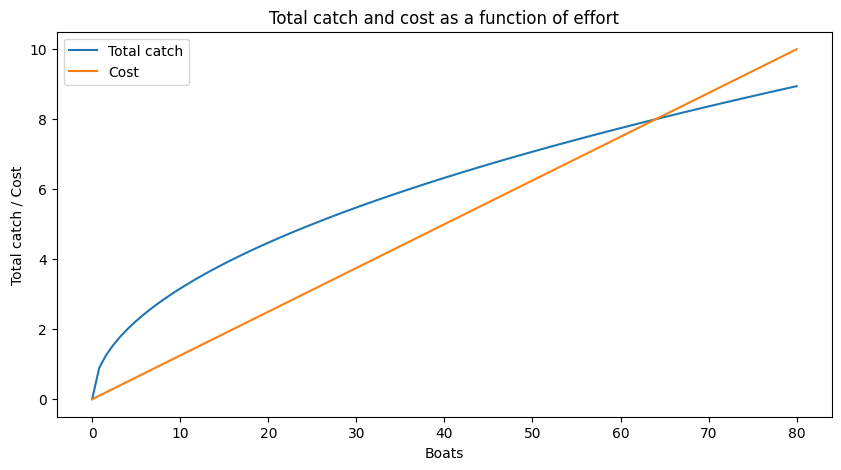

In [25]:
st = 100
b_t = np.linspace(0,80, 100)

yt = y_t(st, b_t, y0)
ct = c_t(b_t, c0)
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(b_t, yt, label='Total catch')
ax.plot(b_t, ct, label='Cost')
ax.legend()
ax.set_xlabel('Boats')
ax.set_ylabel('Total catch / Cost')
ax.set_title('Total catch and cost as a function of effort')

so we can nicely see that the fishing is profiable as long as the revenue is larger than the cost. 

## Maximizing the profits for society

We have seen that each individual has an incentive to fish as much as possible until the profits go to zero. What about society ?

Society would like to maximize the total profits for the society. How can society do this ? Well simply maximize the total profits.

In [26]:
# get the value of where, where the profits crosses zero
profits = yt - ct

for i, p in enumerate(profits):
    if p < 0:
        print(f'Profits go to zero at effort {b_t[i]}')
        break

pIndividual = b_t[i]
# find the value of e where profits are maximized
max_profit_index = np.argmax(profits)
print(f'Maximum profits at effort {b_t[max_profit_index]} with profits {profits[max_profit_index]}')

Profits go to zero at effort 64.64646464646465
Maximum profits at effort 16.161616161616163 with profits 1.999949240834828


Text(0, 0.5, 'Profits')

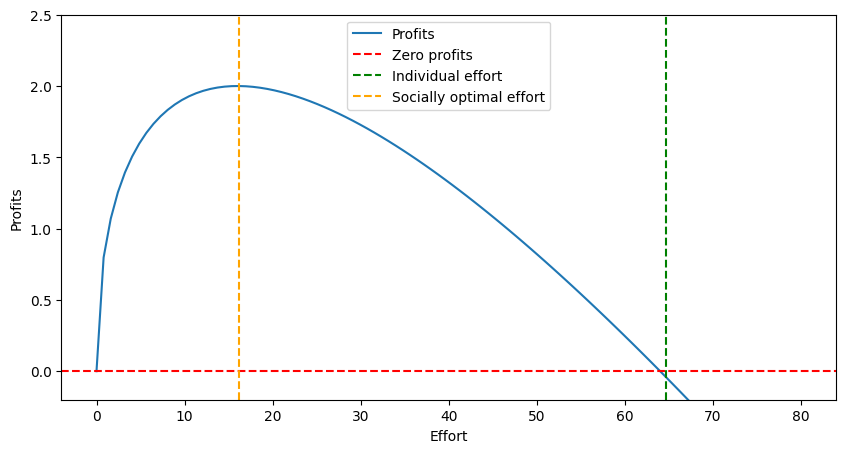

In [27]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(b_t, profits, label='Profits')
ax.axhline(0, color='red', linestyle='--', label='Zero profits')
ax.set_ylim(-0.2, 2.5)
ax.axvline(pIndividual, color='green', linestyle='--', label='Individual effort')
ax.axvline(b_t[max_profit_index], color='orange', linestyle='--', label='Socially optimal effort')
ax.legend()
ax.set_xlabel('Effort')
ax.set_ylabel('Profits')

What a nice visualization of overfishing. 

In [28]:
# parameters of the growth rate
g0 = 0.03; g1 = 0.001

# parameters for the catches
y0 = 0.01

# initial stock
s_init = 100

b_sust = (g0/y0*(1-g1*s_init))**2
print(b_sust)

7.290000000000001


# On the problems with the state solution

In the state we can limit the number of boats and thus the catch. But this might lead to a lack of innovation. We now would like to visualize the problem with the state solution. The state solution is to limit the number of boats to $b_{sust}$. Let us visualize this through the efficiency of different boats. In the blog posts we have different islands. Therefore it would seem perfectly reasonsable to assume that each boat has a different efficiency. Let us assume that the boats are ordered by their efficiency. The most efficient boat is boat 1, the second most efficient boat is boat 2 and so on. Now we can visualize the total cost of fishing as a function of the number of boats. 


We will assume that there are four islands with different costs of fishing. The first island has the most efficient boats, the second island has the second most efficient boats and so on. We can visualize this as follows:

(-0.2, 10.0)

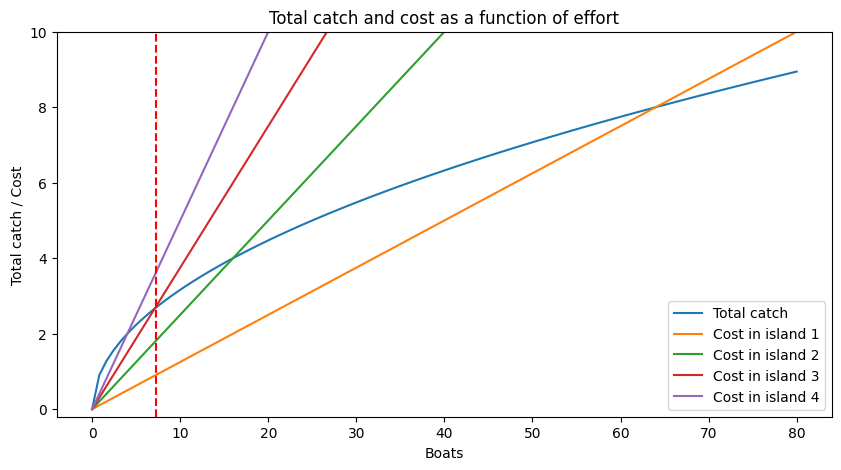

In [29]:
# cost for the different islands

c_islands = [0.125, 0.25, 0.375, 0.5]
st = 100
b_t = np.linspace(0, 80, 100)

yt = y_t(st, b_t, y0)
ct = c_t(b_t, c0)
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(b_t, yt, label="Total catch")
for ii, c in enumerate(c_islands):
    ct = c_t(b_t, c)
    ax.plot(b_t, ct, label="Cost in island {}".format(ii+1))
ax.legend()
ax.set_xlabel("Boats")
ax.set_ylabel("Total catch / Cost")
ax.axvline(b_sust, color='red', linestyle='--', label='Sustainable effort')
ax.set_title("Total catch and cost as a function of effort")
ax.set_ylim(-0.2, 10)

# Now compare

We now have two possibilities. In the unregulated case each one of the fishers goes to the maxmimum of what he thinks he can create. 

In [ ]:
# number of rounds to play
nrounds = 3
nplayers = 4

st = s_init
print(f'Total boats: {total_boats_t}')
# normalize efforts
catch_players = np.zeros((nplayers, nrounds))

boats_t = np.zeros((nplayers, nrounds))
total_boats_t = np.zeros(nrounds)
stock_evolution = np.zeros(nrounds)

for ii in range(nrounds):
    # now safe the time evolution of the stock
    stock_evolution[i] = st

    # given the stock we can also calculate the total number of boats for each of the players
    # and then the total number of boats
    for jj in range(nplayers):
        boats_t[jj, ii] = b_c(y0, st, c_islands[jj])
    
    total_boats_t[ii] = np.sum(boats_t[:, ii])
    b_t = total_boats_t[ii]
    # how much will the stock regenerate?
    gt = g_t(st, g0, g1)
    yt = y_t(st, b_t, y0)
    print(f'Round {i+1}: Total catch = {yt}')
    for j in range(nplayers):
        share = boats_t[i, j] / total_boats_t[i]
        catch_players[j, i] = share*yt
        print(f'Player {j+1} catch = {catch_players[j, i]}')
    # update stock
    st = st - yt+ gt
    print(f'New stock = {st}')

# cumulative catch after each round
print(f'Catch players: {catch_players}')
cumulative_catch = np.cumsum(catch_players, axis=1)
print(f'Cumulative catch: {cumulative_catch}')